In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load data
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    max_features='sqrt',
    oob_score=True,
    random_state=42
)

# Train
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [6]:
# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("OOB Score:", rf.oob_score_)
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
OOB Score: 0.9604395604395605
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.datasets import load_breast_cancer

In [8]:
# Load data for feature names
data = load_breast_cancer()
X1 = pd.DataFrame(data.data, columns=data.feature_names)

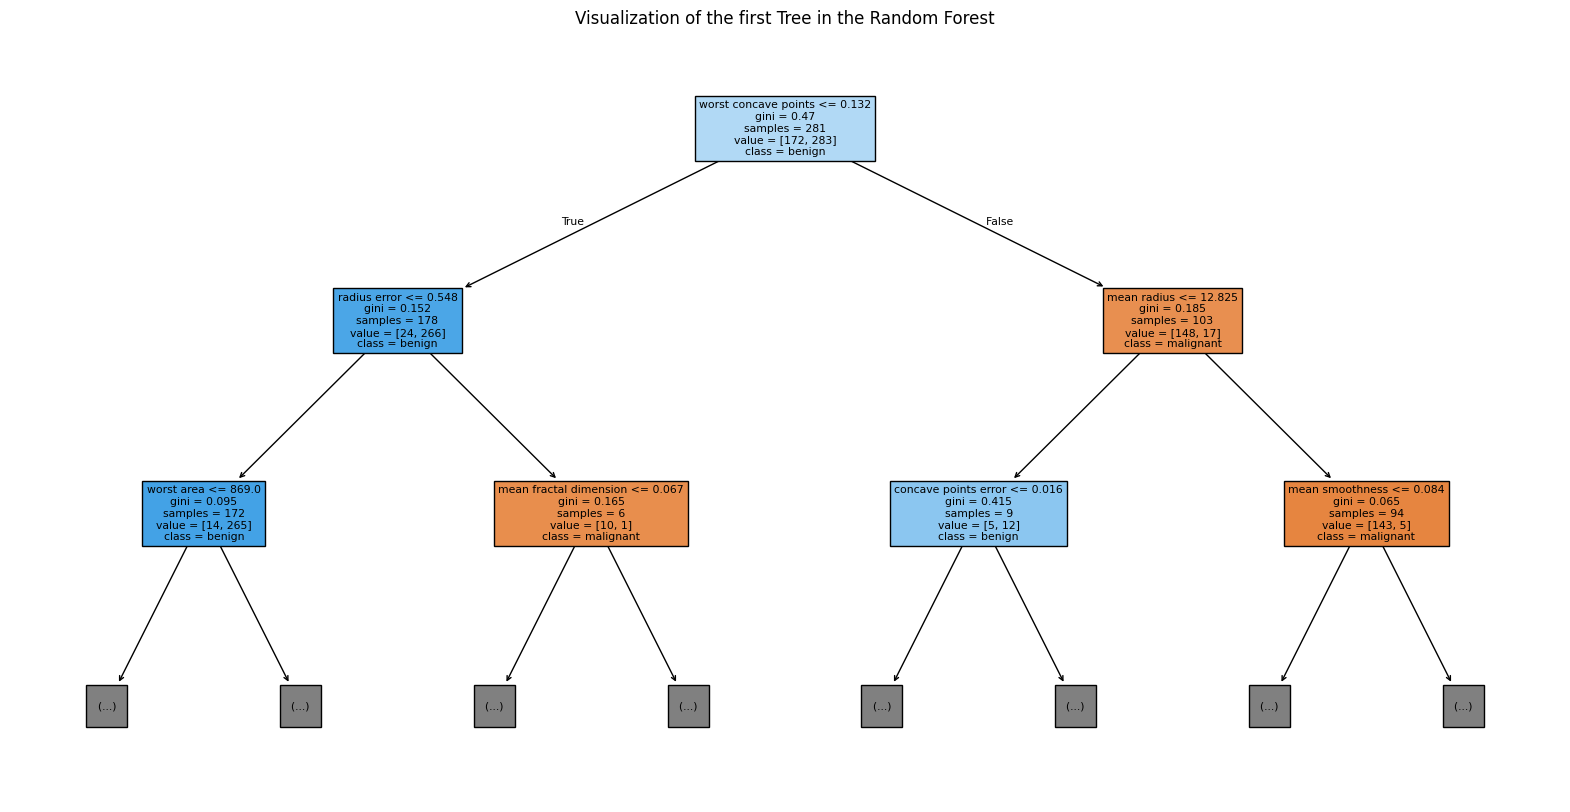

In [9]:
# 1. Visualize a single tree from the forest
# We pick the first estimator (index 0)
tree = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=data.feature_names, 
          class_names=data.target_names, 
          filled=True, 
          max_depth=2) # Limited depth for readability
plt.title('Visualization of the first Tree in the Random Forest')
plt.show()

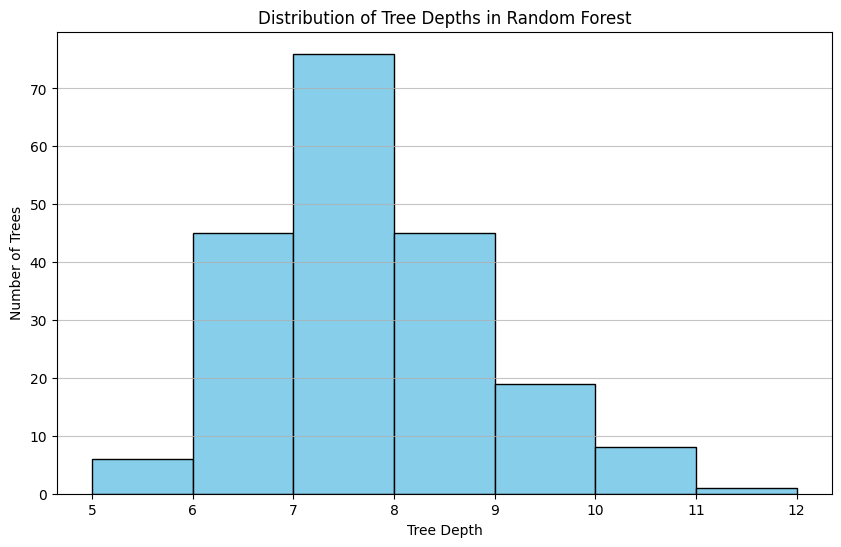

In [10]:
# 2. Visualize tree depths distribution
# Random Forests often have trees of varying depths
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

plt.figure(figsize=(10, 6))
plt.hist(depths, bins=range(min(depths), max(depths) + 2), color='skyblue', edgecolor='black')
plt.title('Distribution of Tree Depths in Random Forest')
plt.xlabel('Tree Depth')
plt.ylabel('Number of Trees')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Load the dataset
df = pd.read_csv('plan_purchase.csv')
print(df.head(5))

   Age  MonthlyIncome  PlanType  UsageScore Purchase
0   56          81476  Standard          90      Yes
1   46          64811  Standard          92      Yes
2   32          56208     Basic          71      Yes
3   25          40150   Premium          82      Yes
4   38          63286  Standard          34       No


In [13]:
# Split features and target
X = df.drop("Purchase", axis=1)
y = df['Purchase'].map({"No": 0, "Yes": 1}) # Convert 'Yes'/'No' to 1/0

In [14]:
# Feature selection
categorical_features = X.select_dtypes(include='object').columns
numeric_features = X.select_dtypes(exclude='object').columns

print("Categorical Features:", list(categorical_features))
print("Numerical Features:", list(numeric_features))

Categorical Features: ['PlanType']
Numerical Features: ['Age', 'MonthlyIncome', 'UsageScore']


In [15]:
# Numerical pipeline: clean -> scale -> normalize
numerical_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median'))
])
# For random forest Standard scaler and normalizer is not needed

# Categorical pipeline: clean -> encode
categorical_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

In [30]:
# Column Transformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

In [26]:
# Full Pipeline with Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    ))
])

In [27]:
# Inspect columns and basic info
print('Columns:', df.columns.tolist())
print('\nnInfo:')
print(df.info())
print('\nnDescribe:')
display(df.describe())

Columns: ['Age', 'MonthlyIncome', 'PlanType', 'UsageScore', 'Purchase']

nInfo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            500 non-null    int64 
 1   MonthlyIncome  500 non-null    int64 
 2   PlanType       500 non-null    object
 3   UsageScore     500 non-null    int64 
 4   Purchase       500 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.7+ KB
None

nDescribe:


,Age,MonthlyIncome,UsageScore
count,500.000000,500.000000,500.000000
mean,39.326000,52753.620000,60.082000
std,12.200386,20181.171598,19.938967
min,18.000000,20055.000000,0.000000
25%,29.000000,35309.500000,46.000000
50%,41.000000,52286.000000,61.000000
75%,50.000000,70364.250000,75.000000
max,59.000000,89896.000000,100.000000


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
Purchase
0    0.562857
1    0.437143
Name: proportion, dtype: float64

Test class distribution:
Purchase
0    0.566667
1    0.433333
Name: proportion, dtype: float64


In [29]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9866666666666667
Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.97      0.98        65

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



In [33]:
new_customer = pd.DataFrame({
    "Age": [30],
    "MonthlyIncome": [55000],
    "PlanType": ["Premium"],
    "UsageScore": [65]
})
new_customer

,Age,MonthlyIncome,PlanType,UsageScore
0,30,55000,Premium,65


In [38]:
prediction = pipeline.predict(new_customer)
probability = pipeline.predict_proba(new_customer)

result = "Yes" if prediction[0] == 1 else "No"

print("Purchase Prediction Result")
print("-" * 30)
print(f"Predicted Purchase      : {result}")
print(f"Probability of Purchase : {probability[0][1]:.2%}")

Purchase Prediction Result
------------------------------
Predicted Purchase      : Yes
Probability of Purchase : 100.00%
